In [1]:
#import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad


from scipy import stats
 
import pickle
 

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: 

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig4"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# Load

In [3]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]


def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

 

adata_5k



View of AnnData object with n_obs × n_vars = 1418806 × 4993
    obs: 'sample_id', 'barcode', 'GSE', 'Site_status', 'Patient_status', 'Location', 'Age', 'Sex', 'n_genes', 'dataset_id', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'lvl5_annotation', 'Mapping_status', 'scanvi_predictions', 'lvl5_annotation_new', 'lvl5_annotation_new2', 'lvl5_annotation_new3', 'lvl5_annotation_new_archive', 'lvl5_annotation_new_preoprhan', 'lvl5_annotation_new10', 'lvl5_annotation_new11', 'test', 'test_n', 'lvl5_annotation_new12', 'lvl5_annotation_new13', 'lvl4_annotation', 'lvl0', 'temp', 't', 'leiden_res0.1', 'Site_status_simple', 'StatusMilo', 'atlas_status', 'atlas_status_reynolds', 'atlas_status_reynolds_simple', 'atlas_status_simple', 'atlas_status_simple2', 'Site_status_binary', 'scanvi_labels

In [4]:
# subset = adata_5k.obs[adata_5k.obs["niche19"] == "Plasma_cell_rich"]
# proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()

# data = pd.DataFrame({
#     "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
#     "proportion_epidermis_mid_inflammatory": proportion_data
# }).reset_index()

# plt.figure(figsize=(4,4), dpi=600)
# plt.scatter(
#     data["baseline_severity"],
#     data["proportion_epidermis_mid_inflammatory"],
#     color="lightcoral", alpha=0.8, s=60  # Changed to light orange (lightcoral)
# )

# texts = []
# for _, row in data.iterrows():
#     texts.append(plt.text(row["baseline_severity"], row["proportion_epidermis_mid_inflammatory"],
#                           row["Sanger patient ID"], fontsize=10))  # Increased font size to 10

# plt.xlabel("Overall Disease severity score" ,fontsize=10 )
# plt.ylabel("Proportion Epidermis Mid Inflammatory", fontsize=10 )

# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.grid(False)
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_3044202/3021192638.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()
/tmp/ipykernel_3044202/3021192638.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()
/tmp/ipykernel_3044202/3021192638.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

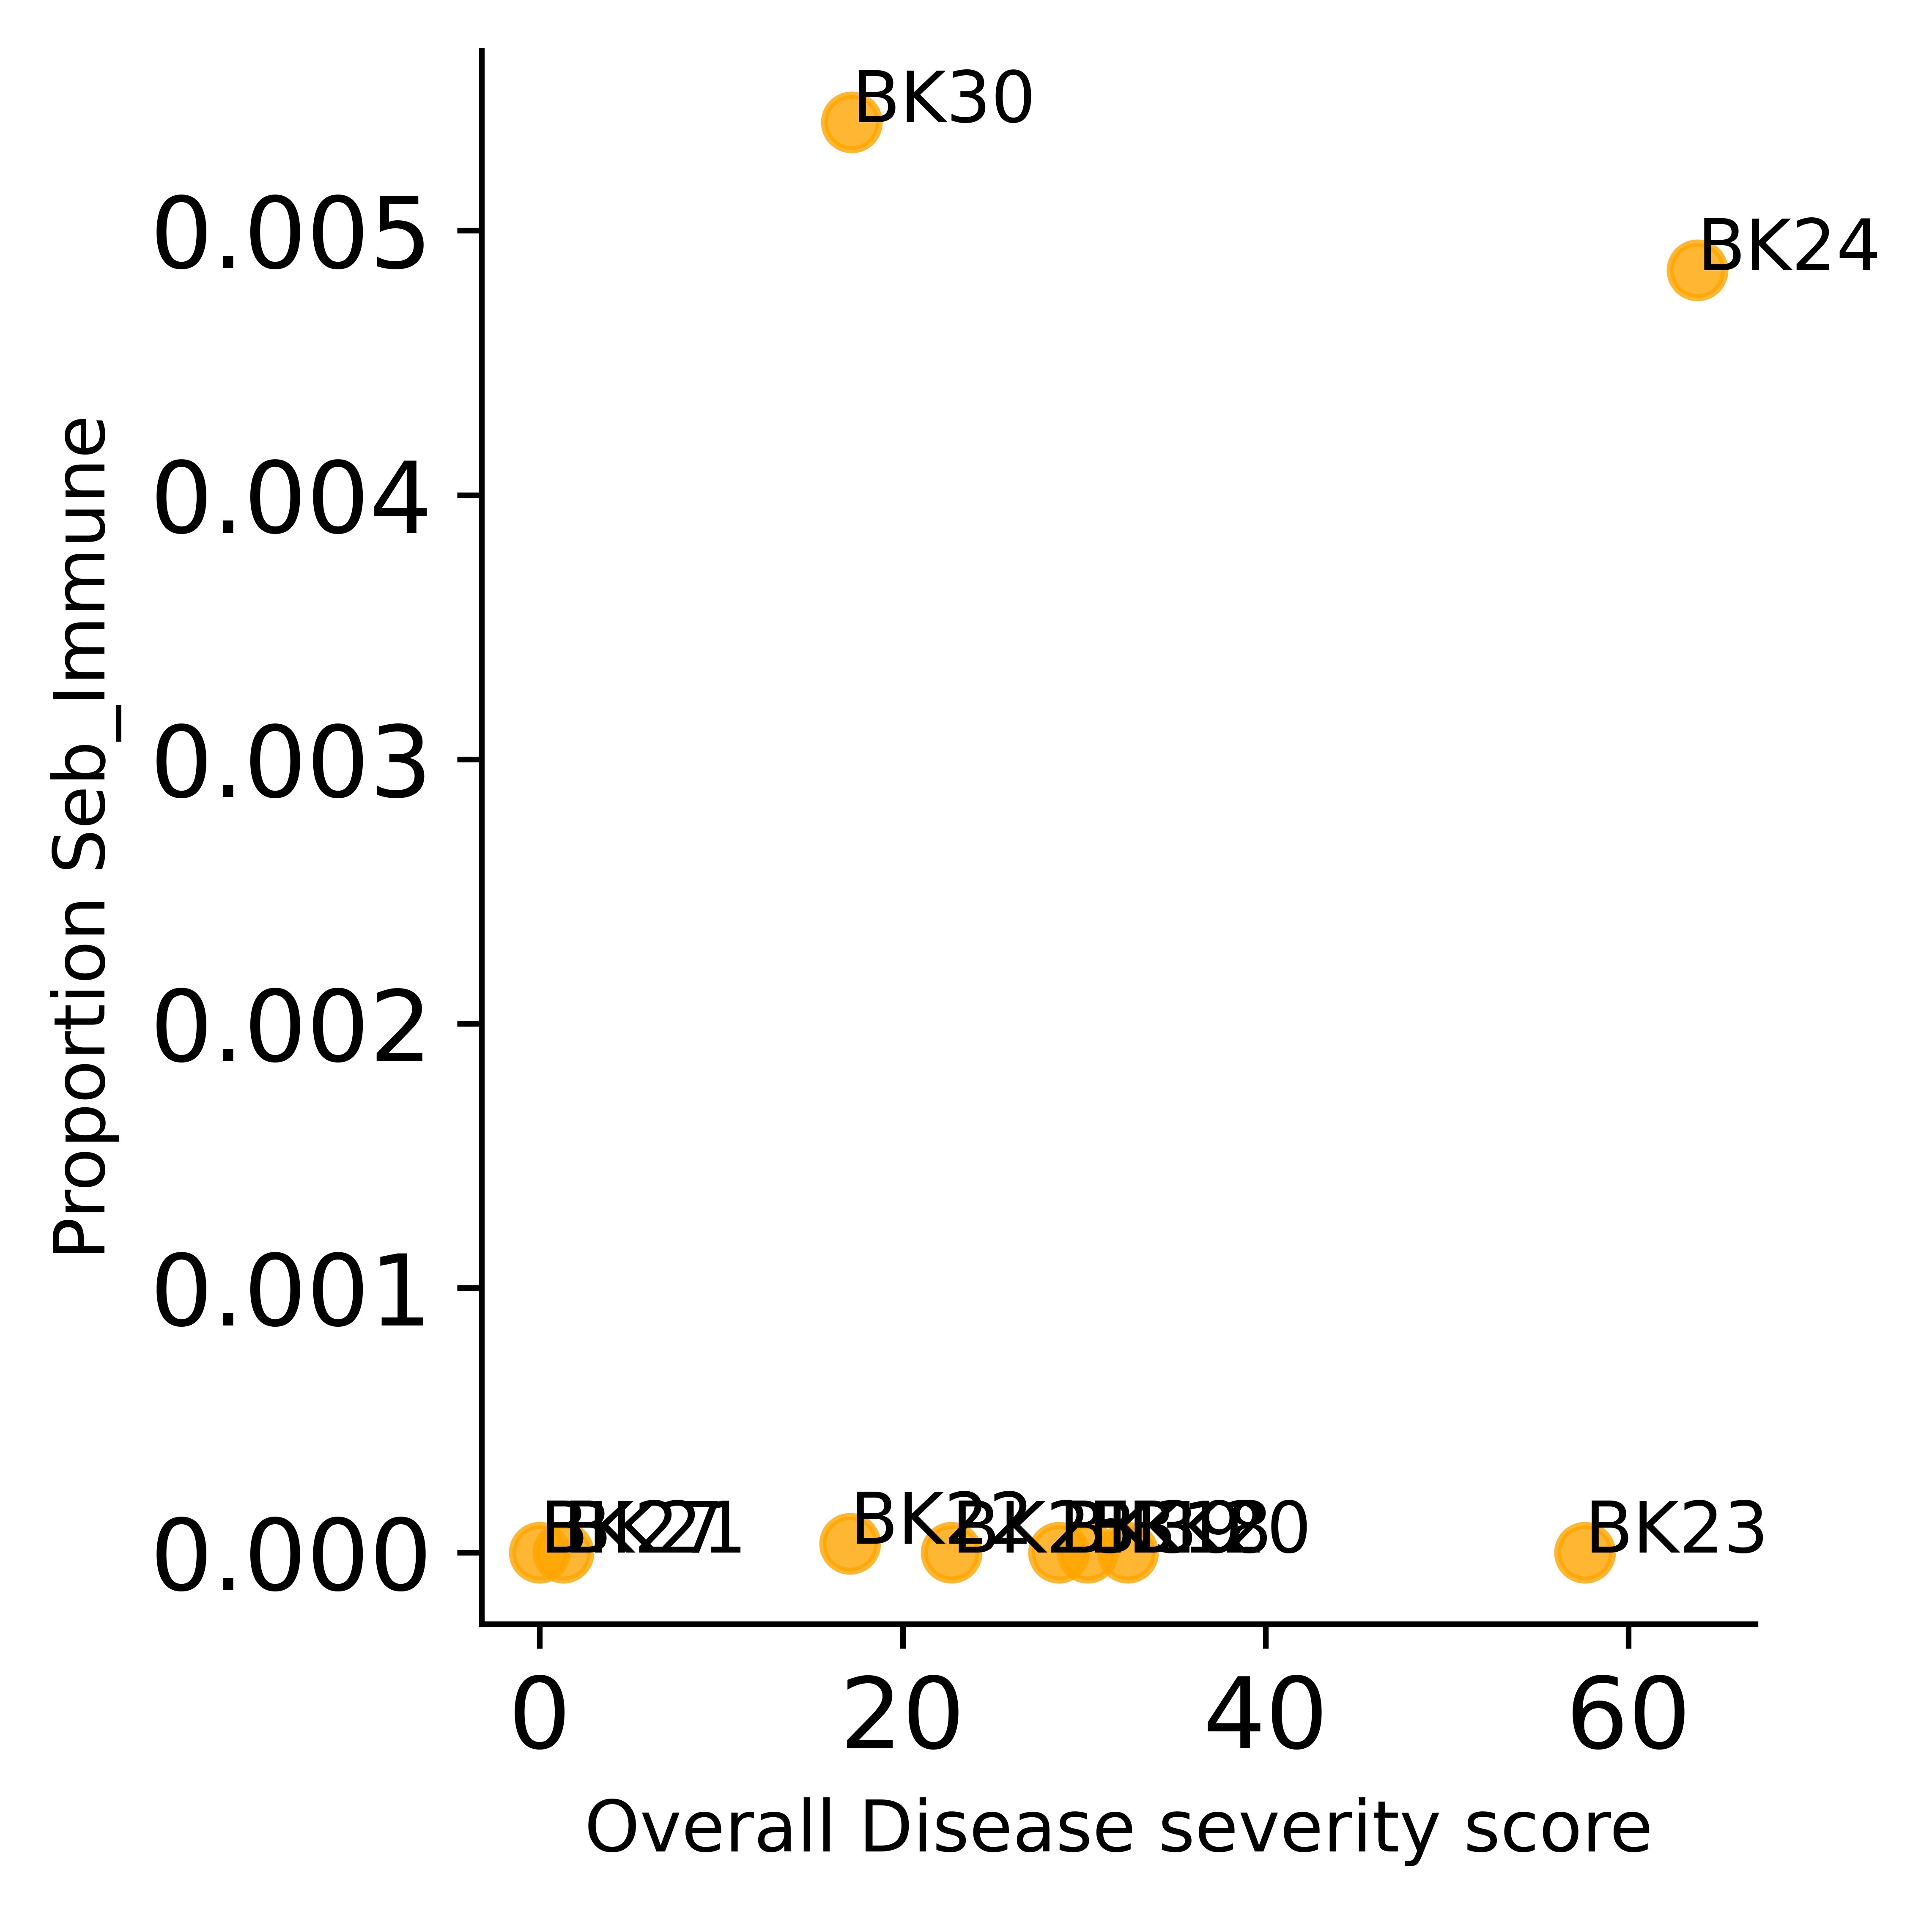

In [10]:
adata_5k_i=adata_5k[adata_5k.obs["Site_status"]=="Non-lesional"]

subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Sebaceous_immune"]
proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()


data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "proportion_epidermis_mid_inflammatory": proportion_data
}).reset_index()

plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["proportion_epidermis_mid_inflammatory"],
    color="orange", alpha=0.8, s=60  # Changed to light orange (lightcoral)
)

texts = []
for _, row in data.iterrows():
    texts.append(plt.text(row["baseline_severity"], row["proportion_epidermis_mid_inflammatory"],
                          row["Sanger patient ID"], fontsize=10))  # Increased font size to 10

plt.xlabel("Overall Disease severity score" ,fontsize=10 )
plt.ylabel("Proportion Seb_Immune", fontsize=10 )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3044202/1245142144.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()
/tmp/ipykernel_3044202/1245142144.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()
/tmp/ipykernel_3044202/1245142144.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

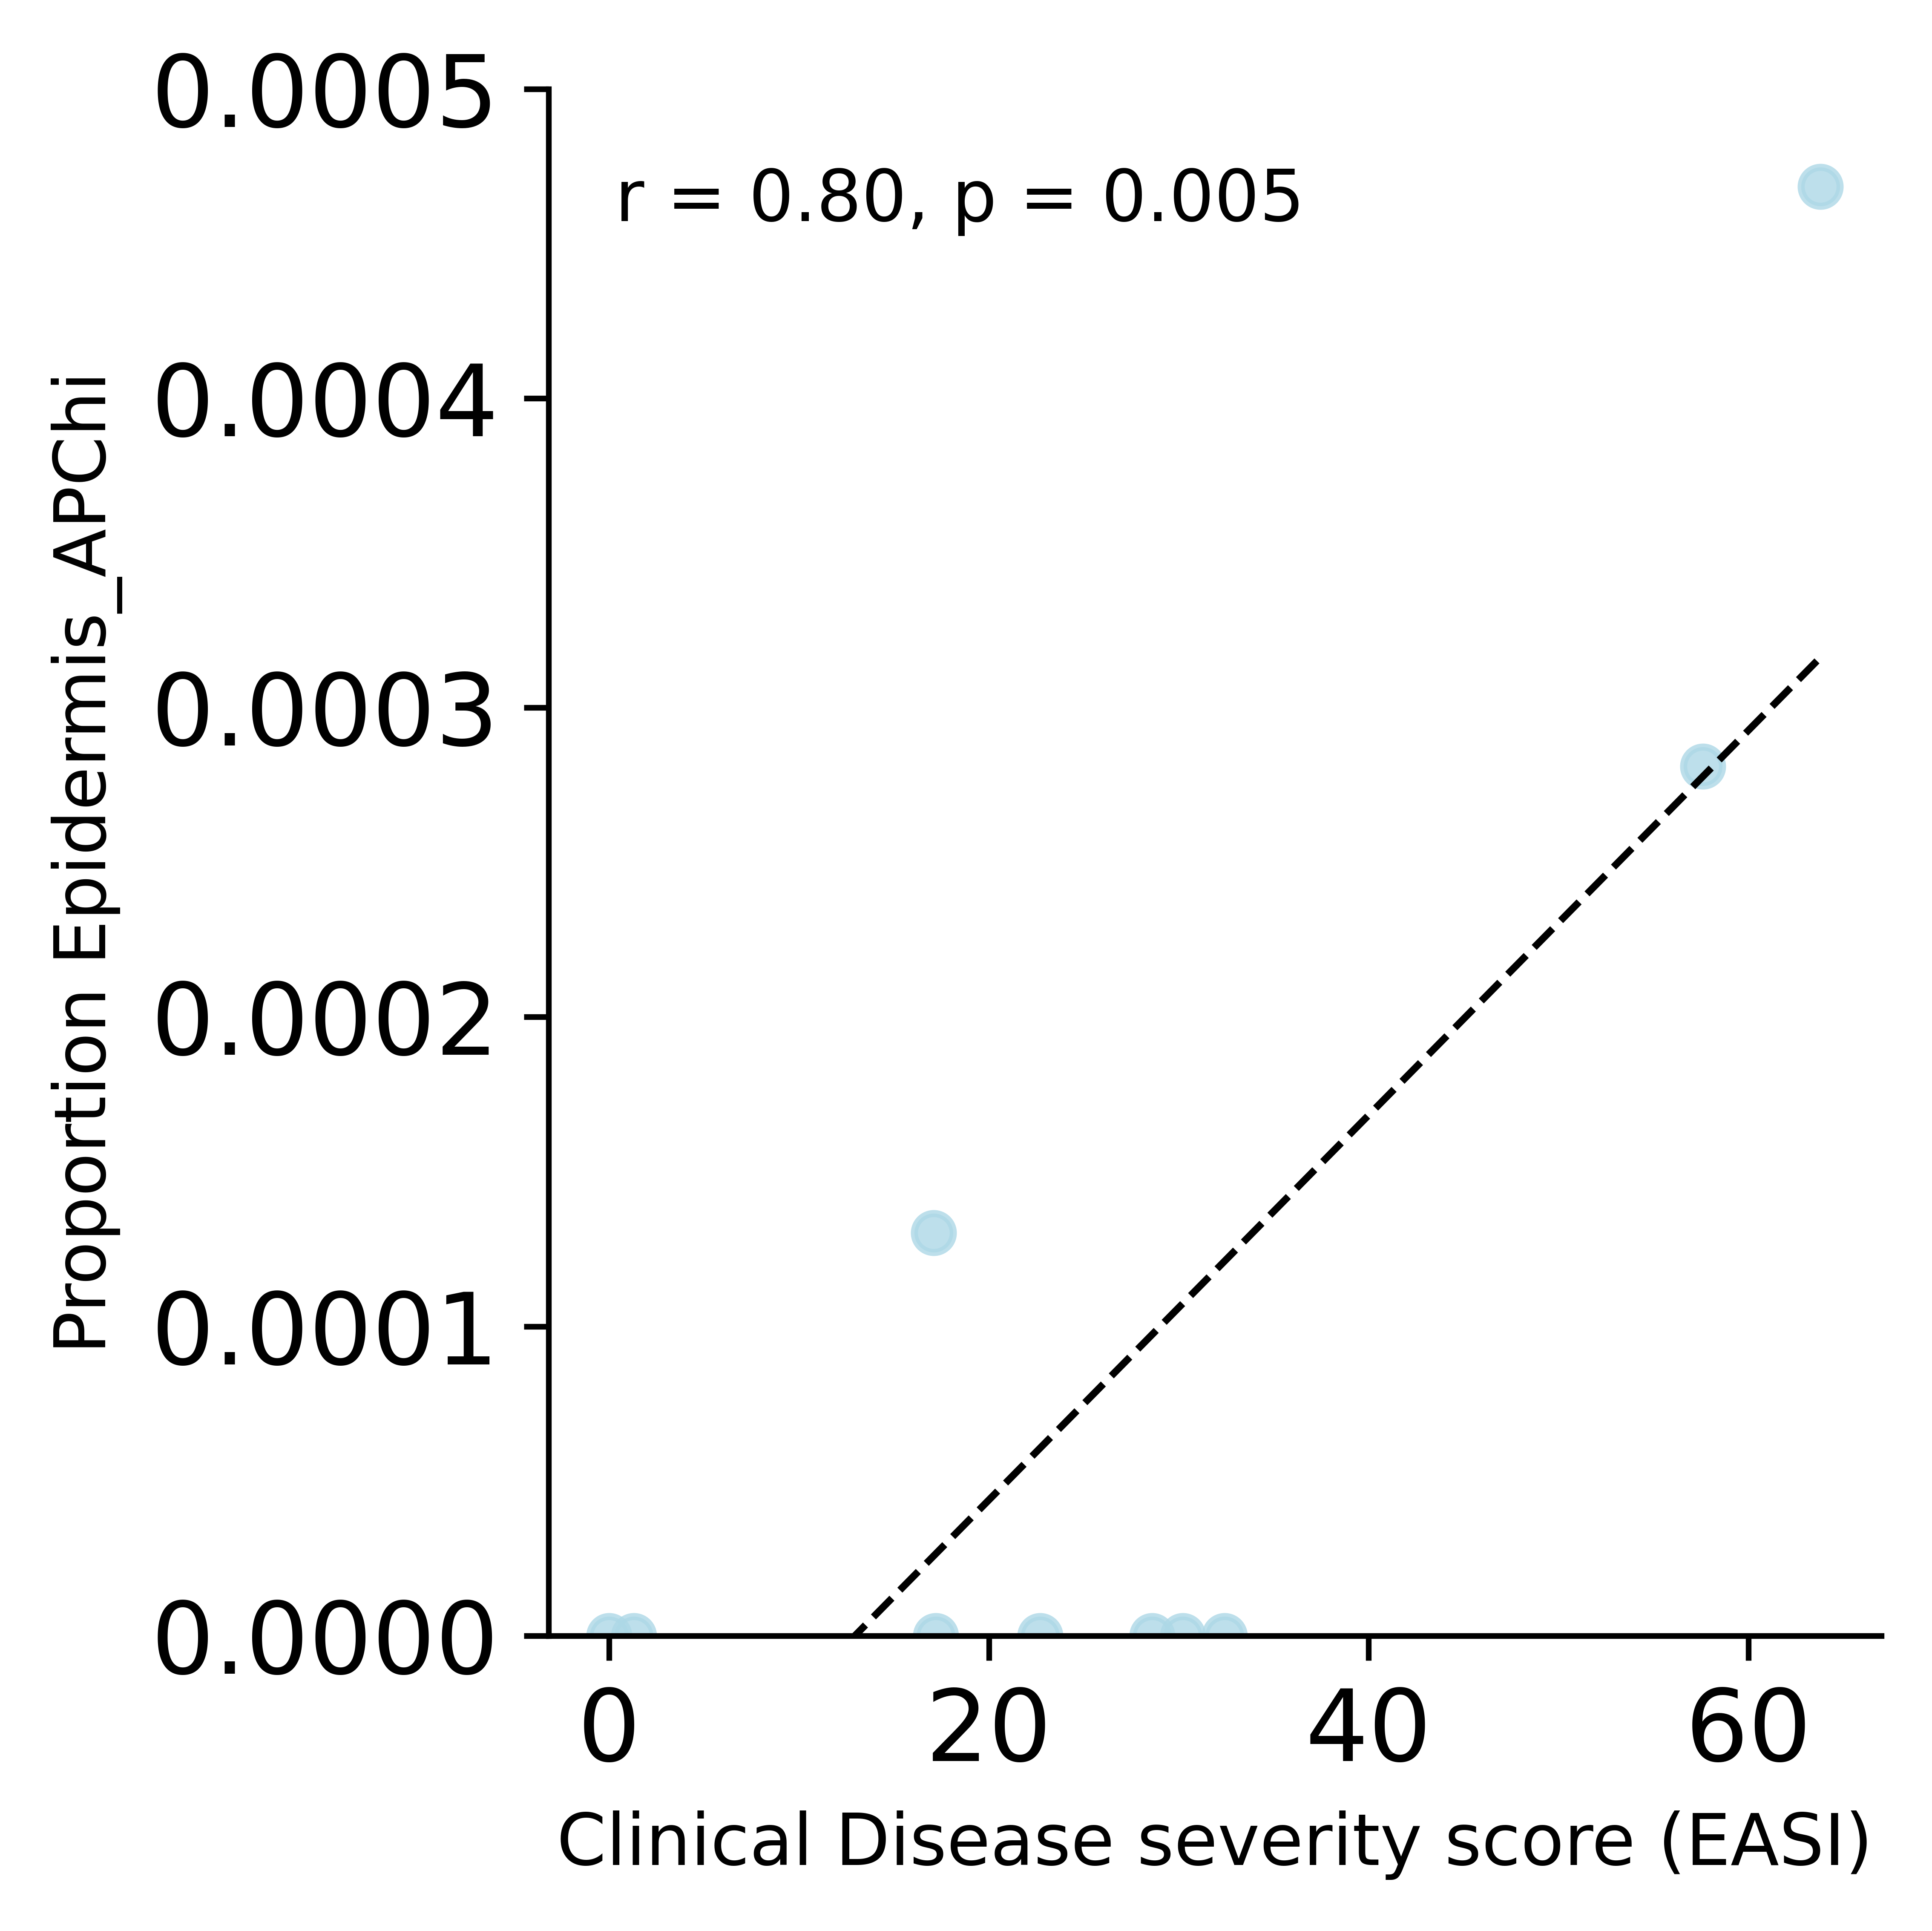

In [6]:
adata_5k_i = adata_5k[adata_5k.obs["Site_status"] == "Non-lesional"]

subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Epidermis_APChi"]
proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()

data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "proportion_epidermis_mid_inflammatory": proportion_data
}).reset_index()

data = data.replace([np.inf, -np.inf], np.nan).dropna(
    subset=["baseline_severity", "proportion_epidermis_mid_inflammatory"]
)

from adjustText import adjust_text

plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["proportion_epidermis_mid_inflammatory"],
    color="lightblue", alpha=0.8, s=30
)

x = data["baseline_severity"]
y = data["proportion_epidermis_mid_inflammatory"]

r, pval = stats.pearsonr(x, y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color="black", linestyle="--", linewidth=1)

if pval < 0.001:
    p_text = "<0.001"
else:
    p_text = f"{pval:.3f}"

plt.text(
    0.05, 0.95,
    f"r = {r:.2f}, p = {p_text}",
    transform=plt.gca().transAxes,
    ha="left", va="top", fontsize=10
)

plt.xlabel("Clinical Disease severity score (EASI)", fontsize=10)
plt.ylabel("Proportion Epidermis_APChi", fontsize=10)
plt.ylim(0, 0.0005)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.savefig("fig3/3L_NONLESIONAL_SEVERITY.pdf", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_3044202/2589822977.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()
/tmp/ipykernel_3044202/2589822977.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()
/tmp/ipykernel_3044202/2589822977.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

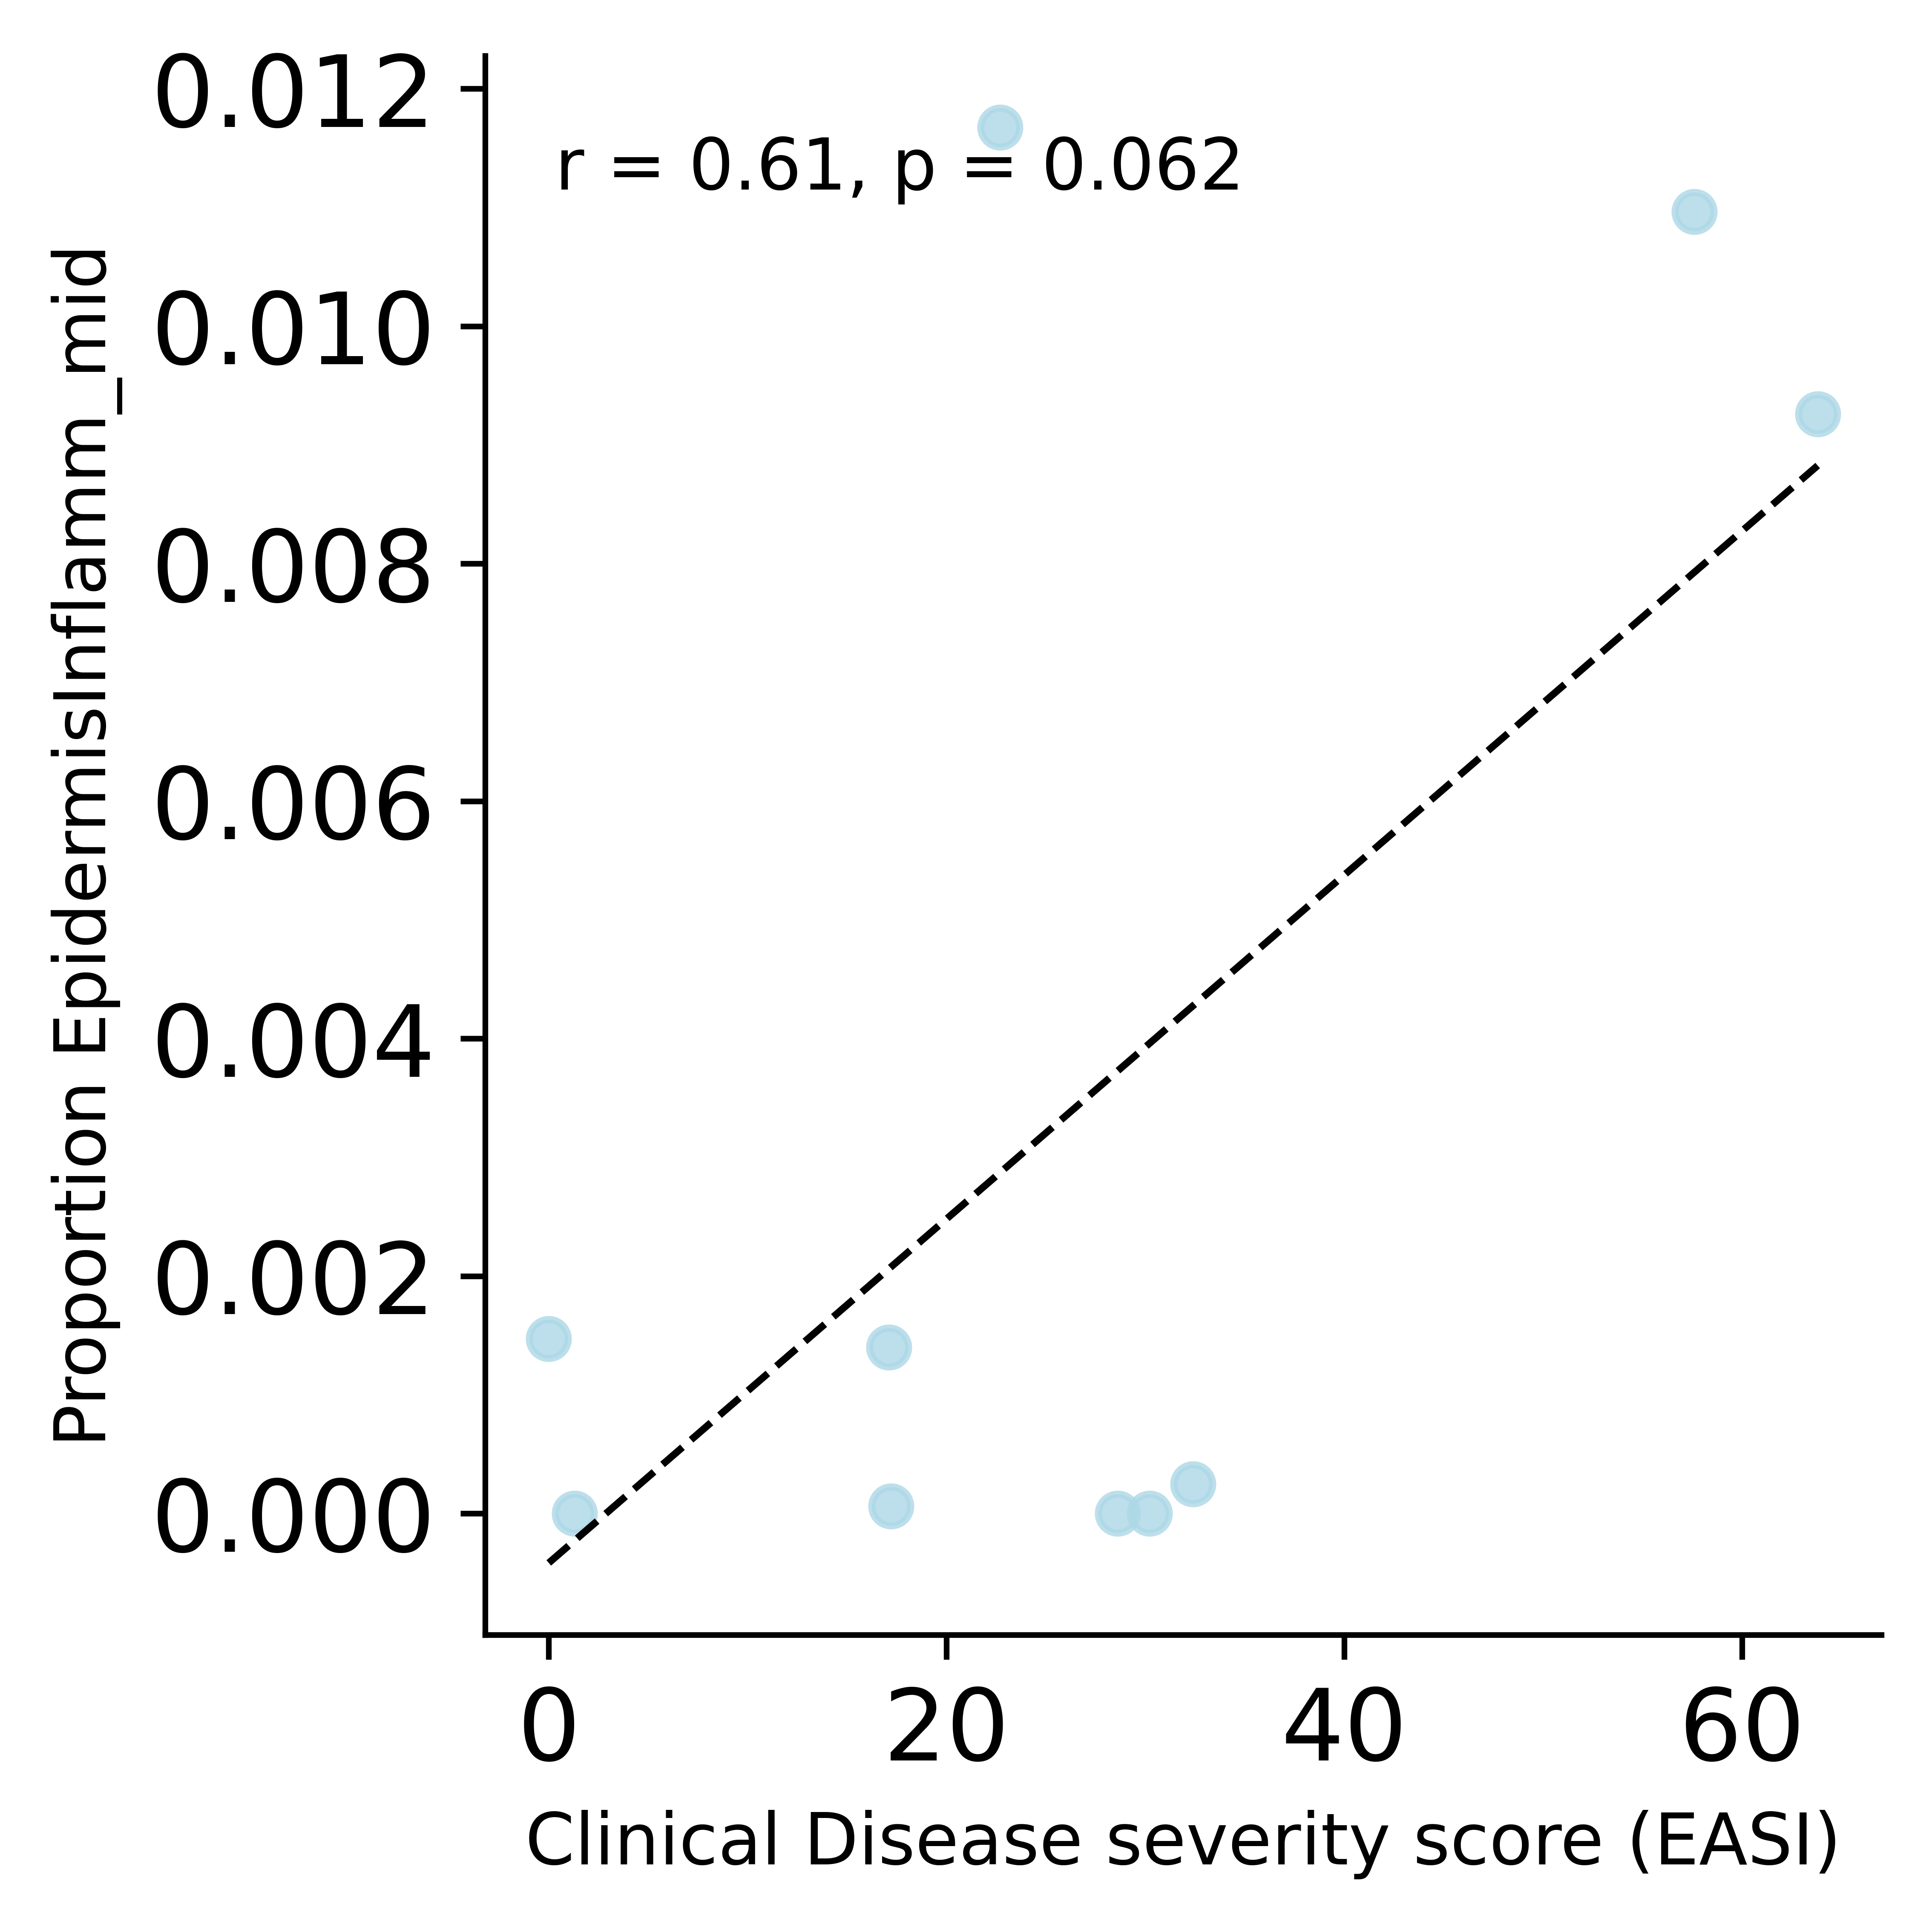

In [7]:


# --- Subset data ---
adata_5k_i = adata_5k[adata_5k.obs["Site_status"] == "Non-lesional"]

# Calculate the proportion of "Sebaceous_immune" cells for each patient
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "EpidermisInflamm_mid"]
proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()

# Build dataframe for plotting
data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "proportion_epidermis_mid_inflammatory": proportion_data
}).reset_index()

# Clean: drop NaN/inf values
data = data.replace([np.inf, -np.inf], np.nan).dropna(
    subset=["baseline_severity", "proportion_epidermis_mid_inflammatory"]
)

# --- Scatter plot ---
from adjustText import adjust_text

# --- Scatter plot ---
plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["proportion_epidermis_mid_inflammatory"],
    color="lightblue", alpha=0.8, s=30
)

# # Collect text objects
# texts = []
# for _, row in data.iterrows():
#     texts.append(
#         plt.text(
#             row["baseline_severity"],
#             row["proportion_epidermis_mid_inflammatory"],
#             row["Sanger patient ID"],
#             fontsize=8
#         )
#     )
# adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# --- Correlation + regression line ---
x = data["baseline_severity"]
y = data["proportion_epidermis_mid_inflammatory"]

# Pearson correlation
r, pval = stats.pearsonr(x, y)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color="black", linestyle="--", linewidth=1)

# Format p-value
if pval < 0.001:
    p_text = "<0.001"
else:
    p_text = f"{pval:.3f}"

# Annotate stats
plt.text(
    0.05, 0.95,
    f"r = {r:.2f}, p = {p_text}",
    transform=plt.gca().transAxes,
    ha="left", va="top", fontsize=10
)

# Axis labels
plt.xlabel("Clinical Disease severity score (EASI)", fontsize=10)
plt.ylabel("Proportion EpidermisInflamm_mid", fontsize=10)
#plt.ylim(0, 0.0005)
# Clean up axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.savefig("fig3/supp2f_epidermisinflamm.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats
# from adjustText import adjust_text

# # --- Subset data ---
# adata_5k_i = adata_5k[adata_5k.obs["Site_status"] == "Non-lesional"]

# # Count "Epidermis_APChi" cells per patient (no denominator)
# subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Epidermis_APChi"]
# cell_counts = subset.groupby("Sanger patient ID").size()

# # Build dataframe for plotting
# data = pd.DataFrame({
#     "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
#     "epidermis_apchi_cells": cell_counts
# }).reset_index()

# # Clean: drop NaN/inf values
# data = data.replace([np.inf, -np.inf], np.nan).dropna(
#     subset=["baseline_severity", "epidermis_apchi_cells"]
# )

# # --- Scatter plot ---
# plt.figure(figsize=(4,4), dpi=600)
# plt.scatter(
#     data["baseline_severity"],
#     data["epidermis_apchi_cells"],
#     color="#2596be", alpha=0.8, s=30
# )

# # Optional: adjust labels to avoid overlap
# # texts = []
# # for _, row in data.iterrows():
# #     texts.append(
# #         plt.text(
# #             row["baseline_severity"],
# #             row["epidermis_apchi_cells"],
# #             row["Sanger patient ID"],
# #             fontsize=8
# #         )
# #     )
# # adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# # --- Correlation + regression line ---
# x = data["baseline_severity"]
# y = data["epidermis_apchi_cells"]

# # Pearson correlation
# r, pval = stats.pearsonr(x, y)

# # Linear regression
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# line_x = np.linspace(x.min(), x.max(), 100)
# line_y = slope * line_x + intercept
# plt.plot(line_x, line_y, color="black", linestyle="--", linewidth=1)

# # Format p-value
# if pval < 0.001:
#     p_text = "<0.001"
# else:
#     p_text = f"{pval:.3f}"

# # Annotate stats
# plt.text(
#     0.05, 0.95,
#     f"r = {r:.2f}, p = {p_text}",
#     transform=plt.gca().transAxes,
#     ha="left", va="top", fontsize=10
# )

# # Axis labels
# plt.xlabel("Clinical Disease severity score (EASI)", fontsize=10)
# plt.ylabel("Number of Epidermis_APChi cells", fontsize=10)

# # Clean up axes
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.grid(False)
# plt.tight_layout()
# plt.show()

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from adjustText import adjust_text

# --- Subset data ---
adata_5k_i = adata_5k[adata_5k.obs["Site_status"] == "Non-lesional"]

# Count "Epidermis_APChi" cells per patient (no denominator)
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "EpidermisInflamm_mid"]
cell_counts = subset.groupby("Sanger patient ID").size()

# Build dataframe for plotting
data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "epidermis_apchi_cells": cell_counts
}).reset_index()

# Clean: drop NaN/inf values
data = data.replace([np.inf, -np.inf], np.nan).dropna(
    subset=["baseline_severity", "epidermis_apchi_cells"]
)

# --- Scatter plot ---
plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["epidermis_apchi_cells"],
    color="#2596be", alpha=0.8, s=30
)

# Optional: adjust labels to avoid overlap
# texts = []
# for _, row in data.iterrows():
#     texts.append(
#         plt.text(
#             row["baseline_severity"],
#             row["epidermis_apchi_cells"],
#             row["Sanger patient ID"],
#             fontsize=8
#         )
#     )
# adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# --- Correlation + regression line ---
x = data["baseline_severity"]
y = data["epidermis_apchi_cells"]

# Pearson correlation
r, pval = stats.pearsonr(x, y)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color="black", linestyle="--", linewidth=1)

# Format p-value
if pval < 0.001:
    p_text = "<0.001"
else:
    p_text = f"{pval:.3f}"

# Annotate stats
plt.text(
    0.05, 0.95,
    f"r = {r:.2f}, p = {p_text}",
    transform=plt.gca().transAxes,
    ha="left", va="top", fontsize=10
)

# Axis labels
plt.xlabel("Clinical Disease severity score (EASI)", fontsize=10)
plt.ylabel("Number of EpidermisInflamm_mid cells", fontsize=10)

# Clean up axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
stop

In [ ]:
0

In [ ]:
adata_5k_i.obs["Site_status"].value_counts()

In [ ]:
stop

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate proportions of "Epidermis_APChi" cells per patient ---
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Epidermis_APChi"]

# Count per patient & site status
proportion_data = (
    subset.groupby(["Sanger patient ID", "Site_status"]).size() /
    adata_5k_i.obs.groupby(["Sanger patient ID", "Site_status"]).size()
)

# Baseline severity (same for both site statuses per patient)
baseline_severity = adata_5k_i.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float)

# Build dataframe: merge baseline severity back onto both site_status rows
data = proportion_data.reset_index(name="proportion_epidermis_mid_inflammatory")
data = data.merge(baseline_severity, left_on="Sanger patient ID", right_index=True)

# Replace inf with NaN, drop bad rows
data = data.replace([np.inf, -np.inf], np.nan).dropna(
    subset=["baseline_severity", "proportion_epidermis_mid_inflammatory"]
)

# --- Plot ---
plt.figure(figsize=(5,5), dpi=600)

# Plot Non-lesional (blue)
non_lesional = data[data["Site_status"] == "Non-lesional"]
plt.scatter(
    non_lesional["baseline_severity"],
    non_lesional["proportion_epidermis_mid_inflammatory"],
    color="blue", alpha=0.8, s=60, label="Non-lesional"
)

# Plot Lesional (red)
lesional = data[data["Site_status"] == "Lesional"]
plt.scatter(
    lesional["baseline_severity"],
    lesional["proportion_epidermis_mid_inflammatory"],
    color="red", alpha=0.8, s=60, label="Lesional"
)

# Annotate every dot with patient ID
for _, row in data.iterrows():
    plt.text(
        row["baseline_severity"],
        row["proportion_epidermis_mid_inflammatory"],
        row["Sanger patient ID"],
        fontsize=8,
        ha="center"
    )

# Labels and cleanup
plt.xlabel("Overall Disease severity score", fontsize=10)
plt.ylabel("Proportion Epidermis_APChi", fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# --- Calculate proportions of "Epidermis_APChi" cells per patient ---
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Epidermis_APChi"]

# Count per patient & site status
proportion_data = (
    subset.groupby(["Sanger patient ID", "Site_status"]).size() /
    adata_5k_i.obs.groupby(["Sanger patient ID", "Site_status"]).size()
)

# Baseline severity (same for both site statuses per patient)
baseline_severity = adata_5k_i.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float)

# Build dataframe
data = proportion_data.reset_index(name="proportion_epidermis_mid_inflammatory")
data = data.merge(baseline_severity, left_on="Sanger patient ID", right_index=True)

# Clean data
data = data.replace([np.inf, -np.inf], np.nan).dropna(
    subset=["baseline_severity", "proportion_epidermis_mid_inflammatory"]
)

# --- Scatter plot ---
plt.figure(figsize=(5,5), dpi=600)

# Non-lesional (blue)
non_lesional = data[data["Site_status"] == "Non-lesional"]
plt.scatter(
    non_lesional["baseline_severity"],
    non_lesional["proportion_epidermis_mid_inflammatory"],
    color="blue", alpha=0.8, s=60, label="Non-lesional"
)

# Lesional (red)
lesional = data[data["Site_status"] == "Lesional"]
plt.scatter(
    lesional["baseline_severity"],
    lesional["proportion_epidermis_mid_inflammatory"],
    color="red", alpha=0.8, s=60, label="Lesional"
)

# Annotate each dot with patient ID
for _, row in data.iterrows():
    plt.text(
        row["baseline_severity"],
        row["proportion_epidermis_mid_inflammatory"],
        row["Sanger patient ID"],
        fontsize=8,
        ha="center"
    )

# --- Correlation and regression line ---
x = data["baseline_severity"]
y = data["proportion_epidermis_mid_inflammatory"]

# Pearson correlation
r, pval = stats.pearsonr(x, y)

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color="black", linestyle="--", linewidth=1)

# Format p-value nicely
if pval < 0.001:
    p_text = "<0.001"
else:
    p_text = f"{pval:.3f}"

# Annotate with r and p
plt.text(
    0.05, 0.95,
    f"r = {r:.2f}, p = {p_text}",
    transform=plt.gca().transAxes,
    ha="left", va="top", fontsize=10
)

# Labels and cleanup
plt.xlabel("Overall Disease severity score", fontsize=10)
plt.ylabel("Proportion Epidermis_APChi", fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:

#from adjustText import adjust_text

# Calculate the proportion of "Epidermis mid inflammatory" cells for each patient
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Epidermis_APChi"]
proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()

# Create a DataFrame for plotting
data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "proportion_epidermis_mid_inflammatory": proportion_data
}).reset_index()

# Scatter plot
plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["proportion_epidermis_mid_inflammatory"],
    color="lightcoral", alpha=0.8, s=60  # Changed to light orange (lightcoral)
)

# Annotate points with "Sanger patient ID" and adjust labels to avoid overlap
texts = []
for _, row in data.iterrows():
    texts.append(plt.text(row["baseline_severity"], row["proportion_epidermis_mid_inflammatory"],
                          row["Sanger patient ID"], fontsize=10))  # Increased font size to 10

# Automatically adjust text positions
#adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# Axis labels
plt.xlabel("Overall Disease severity score" ,fontsize=10 )
plt.ylabel("Proportion Epidermis_APChi", fontsize=10 )

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# No grid or title
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────
# 1 · Calculate the proportion of "Epidermis_APChi" cells per patient
# ─────────────────────────────────────────────────────────────
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Epidermis_APChi"]
proportion_data = (
    subset.groupby("Sanger patient ID").size() /
    adata_5k.obs.groupby("Sanger patient ID").size()
)

# ─────────────────────────────────────────────────────────────
# 2 · Build DataFrame for plotting
# ─────────────────────────────────────────────────────────────
data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"]
                            .first()
                            .astype(float),
    "proportion_epidermis_mid_inflammatory": proportion_data
}).reset_index()

# ─────────────────────────────────────────────────────────────
# 3 · Scatter plot
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(4, 4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["proportion_epidermis_mid_inflammatory"],
    color="lightcoral", alpha=0.8, s=60
)

# ─────────────────────────────────────────────────────────────
# 4 · Annotate only BK23 and BK24
# ─────────────────────────────────────────────────────────────
for _, row in data.iterrows():
    if row["Sanger patient ID"] in ["BK23", "BK24"]:
        plt.text(
            row["baseline_severity"],
            row["proportion_epidermis_mid_inflammatory"],
            row["Sanger patient ID"],
            fontsize=10,
            ha="center",
            va="bottom"
        )

# ─────────────────────────────────────────────────────────────
# 5 · Cosmetics
# ─────────────────────────────────────────────────────────────
plt.xlabel("Overall Disease severity score", fontsize=10)
plt.ylabel("Proportion Epidermis_APChi", fontsize=10)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.grid(False)
plt.tight_layout()

# ─────────────────────────────────────────────────────────────
# 6 · Save and show
# ─────────────────────────────────────────────────────────────
plt.savefig("apchiniche.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────
# 0 · Filter AnnData
# ─────────────────────────────────────────────────────────────
valid_ids = [x for x in adata_time.obs["info_id6"].unique() if "Past" not in x]
adata_time = adata_time[adata_time.obs["info_id6"].isin(valid_ids)]

adata_filtered = adata_time[adata_time.obs["disease_overall"] == "AD"]
valid_samples = (
    adata_filtered.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_filtered = adata_filtered[adata_filtered.obs["info_id6"].isin(valid_samples)]

adata_filtered = adata_filtered[
    adata_filtered.obs["Site_status"].str.startswith(("Les", "Week 12", "Non-"))
]
adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]

# ─────────────────────────────────────────────────────────────
# 1 · Cell-count table
# ─────────────────────────────────────────────────────────────
df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall", "Site_status", "Sanger patient ID"]]

count_tbl = (
    df.groupby(["disease_overall", "Site_status", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index=["disease_overall", "Site_status"],
                    columns=CELL_ANNOTATION,
                    values="cells")
          .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

# ─────────────────────────────────────────────────────────────
# 2 · Convert rows → percent
# ─────────────────────────────────────────────────────────────
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# keep a copy of the MultiIndex for patient-count lookup
multi_index = proportions.index

# pretty display index
proportions.index = [f"{d} — {tp}" for d, tp in proportions.index]

# ─────────────────────────────────────────────────────────────
# 3 · Unique-patient counts
# ─────────────────────────────────────────────────────────────
pat_counts = (
    adata_filtered.obs
        .groupby(["disease_overall", "Site_status"])["Sanger patient ID"]
        .nunique()
)

keep_idx = [idx for idx in multi_index if pat_counts.get(idx, 0) > 0]
proportions = proportions.loc[[f"{d} — {tp}" for d, tp in keep_idx]]

label_counts = {
    f"{d} — {tp}": pat_counts[(d, tp)] for d, tp in keep_idx
}
ytick_labels = [
    f"{label} (n={label_counts[label]})" for label in proportions.index
]

# ─────────────────────────────────────────────────────────────
# 4 · Plot
# ─────────────────────────────────────────────────────────────
plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

# axes cosmetics
ax.set_ylabel("", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_title("", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=12)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# legend underneath
handles = [
    plt.Line2D([0], [0], marker="s", lw=0,
               markerfacecolor=colors_dict.get(ct, "grey"),
               markersize=10, label=ct)
    for ct in ordered_celltypes
]

fig.legend(
    handles, ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

# ─────────────────────────────────────────────────────────────
# 5 · Selectively label y-ticks for BK23 and BK24 only
# ─────────────────────────────────────────────────────────────
ytick_new = []
for lbl in ytick_labels:
    if "BK23" in lbl or "BK24" in lbl:
        ytick_new.append(lbl)
    else:
        ytick_new.append("")
ax.set_yticklabels(ytick_new, fontsize=12)

# ─────────────────────────────────────────────────────────────
# Save figure
# ─────────────────────────────────────────────────────────────
plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("apchiniche.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:

#from adjustText import adjust_text

# Calculate the proportion of "Epidermis mid inflammatory" cells for each patient
subset = adata_5k_i.obs[adata_5k_i.obs["niche19"] == "Tzone-like"]
proportion_data = subset.groupby("Sanger patient ID").size() / adata_5k.obs.groupby("Sanger patient ID").size()

# Create a DataFrame for plotting
data = pd.DataFrame({
    "baseline_severity": adata_5k.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "proportion_epidermis_mid_inflammatory": proportion_data
}).reset_index()

# Scatter plot
plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["proportion_epidermis_mid_inflammatory"],
    color="lightcoral", alpha=0.8, s=60  # Changed to light orange (lightcoral)
)

# Annotate points with "Sanger patient ID" and adjust labels to avoid overlap
texts = []
for _, row in data.iterrows():
    texts.append(plt.text(row["baseline_severity"], row["proportion_epidermis_mid_inflammatory"],
                          row["Sanger patient ID"], fontsize=10))  # Increased font size to 10

# Automatically adjust text positions
#adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# Axis labels
plt.xlabel("Overall Disease severity score" ,fontsize=10 )
plt.ylabel("Proportion Epidermis Mid Inflammatory", fontsize=10 )

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# No grid or title
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
adata_5k.obs["niche_name"] = adata_5k.obs["niche18"]
adata_5k.obs["niche_name"].value_counts()

In [ ]:
import numpy as np

# Create the 'info_id2' column with the conditional logic
adata_5k.obs["info_id7"] = np.where(
    adata_5k.obs["disease_overall"] == "Psoriasis", 
    adata_5k.obs["info_id6"], 
    adata_5k.obs["Sanger patient ID"].astype(str) + "_" + adata_5k.obs["Site_status"].astype(str)
)

In [ ]:
# colors_new = {
#    # 'Epidermis_mid': '#839edd',  # blue
#     'Epidermis_basal': '#505aa1',  # dark blue
#     'Superficial dermis1':"#f6b94f",  #"#f6d17a", # yellow 
#         'Superficial dermis2': '#FFFF00',  # yellow

#     'Superficial dermis / inflammatory memory': "#f6d17a", #"#f6d178", #'#FFA500',  # orange
#     'Perivascular_T-rich': "#dcb0f2", #NICE PRUPLE, # lighter prupkle = "#E5D4F6", # #'#a3dbe5',  # brown
#     'Interstial stroma1': "#aec8e8", # "#FF6600", #pink#"#ffbdc8",# '#FFD700',  # dark yellow
#   #  'Perivascular':  "#845DAE", #  '#fedbe7' PINKSIH,  #'#f8daeb',  # darkish red
#     'Sweat gland channel': '#008080',  # original - 40E0D0
#     'Small blood vessel': "#d73435", #'#fe78bb',  # bright red
#     'Interstial stroma2':  "#6A8ED8", #blueish-quitegood"#6A76C8",# "#ff68b3",#'#B8860B',  # very dark yellow
#     'Sweat gland': '#008080',  # dark grey
#     'Muscle': "#f371af",  # very dark red
#     'Adipocyte+vessels': "#B8860B", #'#FF4500',  # very dark orange
#     'Epidermis mid inflammatory': '#f4e9ef',  # pink
#         'Epidermis mid1': '#f4e9ef',  # pink

#     'Larger blood vessel': "#660000",#"#8B0000", #'#FF6347',  # coral red
#     'Perineural': '#0A0A0A',  # almost black
#     'KC_HF1_outer':  "#94cb72", #'#008000',  # green
#     'Sebocyte_immunecell': "#ff6145",#'#654321',  # dark brown
#     'Sebocyte': '#e28743',  # brown
#    # 'Plasma+pDC': '#808080',  # bright turquoise
#     'Epidermis basal/mid': '#4682B4',  # darkish blue
#     #'Sweat gland channel': '#000000',  # black
#     #'KC_immunecell': '#FF1493',  # dark pink
#     'Perifollicular_VE': '#006400',  # dark green
#     'KC_HF2_basal': '#7CFC00',  # bright green
#     'KC_HF4_medulla': '#00FF00',  # very bright green
#     'KC_HF3_inner': "#abe8bd", #'#228B22',  # darkish green
#     'KC_immune': '#FFB6C1',  # light pink
#      'KCinflamm_late': '#c8cada',  # very dark blue
#     'Artery_endothelium': '#fe78bd',  # bright red
    
#    # 'Epidermis_late': '#b1dae6',
#  'Superficial dermis regenerative': '#ffa500',
#  'Nonspecific': '#D3D3D3',
#  'Interstitial stroma': '#d0e1f2',
#  'Hypodermis': '#ffffff',
#  'Large BV': '#660000',
#  'Small BV': "#c43f40",#'#D96B6B',
#  'Perineural?': '#0A0A0A',
#  'Perineural?/HF?': '#2a2a2a',
#  'Epidermis basal2': '#505aa1',
#  'Lymphoid Tzone-like': "#845DAE",# '#F4D1A1',
#   'Lymphoid Tzone-like ':  "#845DAE",# '#F4D1A1
    
#  'BV outer': '#f371af',

#     'Sebaceous gland':"#94cb72",  #"#E6F9E6", #"#94cb72",#'#e28743', too white = "#F0FCF0",
#  'Plasma cell niche': "#F9D4FF",#'#ff5e00',
#  'KC_HF1': '#94cb72',
#      'KC_HF': "#036C3B", #'#94cb72',

#  'Sebaceous gland_immune': '#ff6145',
# # 'KC_HF2': #
#     'HF_Perineural': '#00FF00',
#  'Sebaceous duct': '#e28743',
#  'KC_HairShaft': '#abe8bd',
#  'Epidermis_Inflammatory': '#f2e7ed',
#  'Epidermis_immune': "#ff1493", # '#f4e9ef',
#  'Epidermis_basal_immune':"#f4e9ef",
#     'Epidermis_Inflamm_immune': "#e23291", #"#ffe4e3",#"#ffe4e3", #  # '#f4e9ef',
#         'Epidermis_late':"#2a2f5c" ,# "#2e2e2e",#'#b1dae6',  # light blue

# 'Epidermis_mid1':  '#4682B4', 
#     'Epidermis mid':  '#4682B4', 
# 'Epidermis_mid2':  '#4682B4', 

    
#      'Epidermis_basal1': "#f0f8ff",#'#505aa1',

#         'Epidermis basal_cycling': "#505aa1",  #  e2d8dd   "#505aa1",#"#c590a5" , # '#e0c5d2',

#      #007FFF
    
# }
 
 
# # with open('/nfs/team298/ls34/niche_colors.pkl', 'wb') as f:
# #     pickle.dump(colors, f)


# NEW_LI=[]
# for x in adata_5k.obs["niche11"].unique():
#     if x not in colors_new.keys():
#         print(x)
#         NEW_LI.append(x)


# import pickle
# file_path = '/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl'

# # Save the dictionary to the file
# with open(file_path, 'wb') as file:
#     pickle.dump(colors_new, file)

# try:
#     del(adata_5k.uns['niche11_colors'])
# except:
#     1
# adata_5k=adata_5k.copy()
# adata_5k.obs['niche11'] =adata_5k.obs['niche11'] .astype('category')
# adata_5k.uns['niche11_colors'] = [colors_new.get(cat, '#D3D3D3')  # Default to light grey if not found
#                                      for cat in adata_5k.obs['niche11'].cat.categories]

# {x:"" for x in NEW_LI}


In [ ]:

NICHE11="Tzone-like"
MINIMUM_PERCENT = 0.05
COLOR_PICKLE_PATH =  '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)

In [ ]:


# --------------------------
# Parameters
# --------------------------
NICHE_FILTER = "Plasma_cell_niche"
MIN_CELLS_PER_DONOR = 10
MIN_PERCENT_FOR_TEXT = 5
SECTION_ID = 'info_id7'

# --------------------------
# Filter AnnData
# --------------------------


adata_filtered = adata_5k[adata_5k.obs["niche18"] == NICHE_FILTER]
donor_counts = adata_filtered.obs[SECTION_ID].value_counts()
valid_donors = donor_counts[donor_counts > MIN_CELLS_PER_DONOR].index
adata_filtered = adata_filtered[adata_filtered.obs[SECTION_ID].isin(valid_donors)]

# --------------------------
# Tabulate cell type counts per donor
# --------------------------
df = adata_filtered.obs[[SECTION_ID, "lvl5_annotation"]].copy()
grouped = df.groupby([SECTION_ID, "lvl5_annotation"]).size().reset_index(name="cell_count")
pivot = grouped.pivot(index=SECTION_ID, columns="lvl5_annotation", values="cell_count").fillna(0)

# Sort columns to match color dict order (if applicable)
ordered_celltypes = [ct for ct in colors.keys() if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

# Normalize rows to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# --------------------------
# Build color palette
# --------------------------
plot_colors = [colors.get(cell_type, "grey") for cell_type in ordered_celltypes]

# --------------------------
# Plot
# --------------------------
fig, ax = plt.subplots(figsize=(16, 4))
bars = proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# # Annotate bars with cell type names
# for i, (idx, row) in enumerate(proportions.iterrows()):
#     cum_width = 0
#     for j, val in enumerate(row):
#         if val > MIN_PERCENT_FOR_TEXT:
#             ax.text(
#                 cum_width + val / 2,
#                 i,
#                 ordered_celltypes[j],
#                 ha='center',
#                 va='center',
#                 fontsize=10,
#                 color='black',
#                 clip_on=True
#             )
#         cum_width += val

# --------------------------
# Aesthetics
# --------------------------
ax.set_ylabel("Donor", fontsize=14)
ax.set_xlabel("Proportion", fontsize=14)
ax.set_title(f"{NICHE_FILTER} — Cell Type Composition by Donor", fontsize=16)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend
ax.legend(
    title=None,
    labels=ordered_celltypes,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=6,
    fontsize=10,
    frameon=False
)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
adata_5k[adata_5k.obs["niche19"]=="Plasma_cell_niche"].obs.lvl5_annotation.value_counts()

In [ ]:
sorted(adata_filtered.obs['info_id7'].unique())

In [ ]:
# li = ['BK20_Week 12',
#  'BK23_Week 12',
#   'BK27_Week 12',
#  'BK24_Lesional Baseline',
#  'BK27_Lesional Baseline',
#  'BK27_Non-lesional Baseline',
# ]
# li[::-1]

In [ ]:
custom_order = sorted(adata_filtered.obs['info_id7'].unique())
# ['BK20_Week 12',
#  'BK23_Week 12',
#  'BK24_Lesional Baseline',
#  'BK27_Lesional Baseline',
#  'BK27_Non-lesional Baseline',
#  'BK27_Week 12',
#  'nan_Psoriasis_replicate_PostRx']

In [ ]:
# RENAME = {'Week 12':'Week 12',
#           'Non-lesional Baseline': "NL",
#           'Lesional Baseline': "L"
#          }
# adata_filtered.obs["Timepoint3"] = adata_filtered.obs["Timepoint2"].map(RENAME)

In [ ]:
adata_filtered.obs["lvl5_annotation"].value_counts()

In [ ]:


# --------------------------
# Parameters
# --------------------------
NICHE_FILTER = "Plasma_cell_niche"
MIN_CELLS_PER_DONOR = 10
MIN_PERCENT_FOR_TEXT = 5

# --------------------------
# Filter AnnData
# --------------------------
adata_filtered = adata_5k[adata_5k.obs["niche18"] == NICHE_FILTER]
donor_counts = adata_filtered.obs[SECTION_ID].value_counts()
valid_donors = donor_counts[donor_counts > MIN_CELLS_PER_DONOR].index
adata_filtered = adata_filtered[adata_filtered.obs[SECTION_ID].isin(valid_donors)]
celltype_counts = adata_filtered.obs["lvl5_annotation"].value_counts()
valid_celltypes = celltype_counts[celltype_counts > 2].index
adata_filtered = adata_filtered[adata_filtered.obs["lvl5_annotation"].isin(valid_celltypes)]
# --------------------------
# Tabulate cell type counts per donor
# --------------------------
df = adata_filtered.obs[[SECTION_ID, "lvl5_annotation"]].copy()
grouped = df.groupby([SECTION_ID, "lvl5_annotation"]).size().reset_index(name="cell_count")
pivot = grouped.pivot(index=SECTION_ID, columns="lvl5_annotation", values="cell_count").fillna(0)

# Sort columns to match color dict order (if applicable)
ordered_celltypes = [ct for ct in colors.keys() if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

# Normalize rows to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions = proportions.reindex(custom_order)
# --------------------------
# Build color palette
# --------------------------
plot_colors = [colors.get(cell_type, "grey") for cell_type in ordered_celltypes]

# --------------------------
# Plot
# --------------------------
fig, ax = plt.subplots(figsize=(4, 6))
bars = proportions.plot(
    kind="bar",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# --------------------------
# Aesthetics
# --------------------------
ax.set_xlabel("Donor", fontsize=14)
ax.set_ylabel("Proportion", fontsize=14)
ax.set_title(f"", fontsize=16)
ax.set_xticks(range(len(proportions)))
short_labels = [x.split("_")[0] for x in proportions.index]
ax.set_xticklabels(short_labels, rotation=90, fontsize=12)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0%", "50%", "100%"], fontsize=12)

# Get handles and labels from plot
# handles, labels = ax.get_legend_handles_labels()

# # # Legend below plot, 1 column, wider color boxes
# ax.legend(
#     handles, labels,
#     bbox_to_anchor=(0.5, -0.45),
#     loc="upper center",
#     ncol=1,
#     fontsize=6,
#     frameon=False,
#     handlelength=3,
#     handletextpad=0.8,
#     columnspacing=1.0
# )

handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

ax.legend(
    handles, labels,
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),  # slightly outside plot
    ncol=1,
    fontsize=9,
    frameon=False,
    handlelength=3,
    handletextpad=0.8,
    columnspacing=1.0
)


# ---- Timepoint overlay annotations above bars ----
# Define the timepoint groupings manually
timepoints = ["NL", "L", "L", "Week12", "Week12", "Week12"]  # in order of bars
timepoint_colors = {
    "NL": "#90EE90",       # light grey
    "L": "#FF9999",        # soft red
    "Week12": "#9999FF"    # soft blue
}

# Get x-tick positions
bar_positions = np.arange(len(proportions))

# Add a small colored bar above each x-bar to indicate timepoint
for xpos, tp in zip(bar_positions, timepoints):
    ax.add_patch(plt.Rectangle(
        (xpos - 0.4, 101),    # slightly wider than the bar, above 100%
        width=0.8,
        height=3,
        color=timepoint_colors.get(tp, "grey"),
        clip_on=False,
        linewidth=0
    ))
# # Add timepoint labels above the colored bars
# for xpos, tp in zip(bar_positions, timepoints):
#     ax.text(
#         xpos,            # x-position
#         104.5,           # y-position slightly above the colored bar
#         tp,              # label text
#         ha='center',
#         va='bottom',
#         fontsize=10,
#         color='black',
#         clip_on=False
#     )
# Adjust y-limit so there's space for labels above bars
ax.set_ylim(0, 115)

# Group definitions: (label, start_index, end_index)
groups = [
    ("NL", 0, 0),
    ("L", 1, 2),
    ("Week 12", 3, 5)
]

# Draw rectangles and labels above bars
for label, start, end in groups:
    x_center = (start + end) / 2
    width = end - start + 1

    # # Colored bar (already drawn earlier, but repeat here if needed)
    # ax.add_patch(
    #     plt.Rectangle(
    #         (start - 0.5, 101),      # x, y
    #         width,                   # width
    #         3,                       # height
    #         color="lightgrey",       # neutral background bar
    #         transform=ax.transData,
    #         zorder=0
    #     )
    # )

    # Label centered above the group
    ax.text(
        x_center,
        105.5,                      # y-position
        label,
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Extend y-limit to fit the annotation bars
ax.set_ylim(0, 105)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("fig3e_narrower.pdf", dpi=300, bbox_inches="tight")

plt.show()



In [ ]:


# --------------------------
# Parameters
# --------------------------
NICHE_FILTER = "Plasma_cell_niche"
MIN_CELLS_PER_DONOR = 10
MIN_PERCENT_FOR_TEXT = 5

# --------------------------
# Filter AnnData
# --------------------------
adata_filtered = adata_5k[adata_5k.obs["niche18"] == NICHE_FILTER]
donor_counts = adata_filtered.obs[SECTION_ID].value_counts()
valid_donors = donor_counts[donor_counts > MIN_CELLS_PER_DONOR].index
adata_filtered = adata_filtered[adata_filtered.obs[SECTION_ID].isin(valid_donors)]
celltype_counts = adata_filtered.obs["lvl5_annotation"].value_counts()
valid_celltypes = celltype_counts[celltype_counts > 10].index
adata_filtered = adata_filtered[adata_filtered.obs["lvl5_annotation"].isin(valid_celltypes)]
# --------------------------
# Tabulate cell type counts per donor
# --------------------------
df = adata_filtered.obs[[SECTION_ID, "lvl5_annotation"]].copy()
grouped = df.groupby([SECTION_ID, "lvl5_annotation"]).size().reset_index(name="cell_count")
pivot = grouped.pivot(index=SECTION_ID, columns="lvl5_annotation", values="cell_count").fillna(0)

# Sort columns to match color dict order (if applicable)
ordered_celltypes = [ct for ct in colors.keys() if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

# Normalize rows to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions = proportions.reindex(custom_order)
# --------------------------
# Build color palette
# --------------------------
plot_colors = [colors.get(cell_type, "grey") for cell_type in ordered_celltypes]

# --------------------------
# Plot
# --------------------------
fig, ax = plt.subplots(figsize=(5, 6))
bars = proportions.plot(
    kind="bar",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# --------------------------
# Aesthetics
# --------------------------
ax.set_xlabel("Donor", fontsize=14)
ax.set_ylabel("Proportion", fontsize=14)
ax.set_title(f"", fontsize=16)
ax.set_xticks(range(len(proportions)))
short_labels = [x.split("_")[0] for x in proportions.index]
ax.set_xticklabels(short_labels, rotation=90, fontsize=12)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0%", "50%", "100%"], fontsize=12)

# Get handles and labels from plot
# handles, labels = ax.get_legend_handles_labels()

# # # Legend below plot, 1 column, wider color boxes
# ax.legend(
#     handles, labels,
#     bbox_to_anchor=(0.5, -0.45),
#     loc="upper center",
#     ncol=1,
#     fontsize=6,
#     frameon=False,
#     handlelength=3,
#     handletextpad=0.8,
#     columnspacing=1.0
# )

handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

ax.legend(
    handles, labels,
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),  # slightly outside plot
    ncol=1,
    fontsize=9,
    frameon=False,
    handlelength=3,
    handletextpad=0.8,
    columnspacing=1.0
)


# ---- Timepoint overlay annotations above bars ----
# Define the timepoint groupings manually
timepoints = ["NL", "L", "L", "Week12", "Week12", "Week12"]  # in order of bars
timepoint_colors = {
    "NL": "#90EE90",       # light grey
    "L": "#FF9999",        # soft red
    "Week12": "#9999FF"    # soft blue
}

# Get x-tick positions
bar_positions = np.arange(len(proportions))

# Add a small colored bar above each x-bar to indicate timepoint
for xpos, tp in zip(bar_positions, timepoints):
    ax.add_patch(plt.Rectangle(
        (xpos - 0.4, 101),    # slightly wider than the bar, above 100%
        width=0.8,
        height=3,
        color=timepoint_colors.get(tp, "grey"),
        clip_on=False,
        linewidth=0
    ))
# # Add timepoint labels above the colored bars
# for xpos, tp in zip(bar_positions, timepoints):
#     ax.text(
#         xpos,            # x-position
#         104.5,           # y-position slightly above the colored bar
#         tp,              # label text
#         ha='center',
#         va='bottom',
#         fontsize=10,
#         color='black',
#         clip_on=False
#     )
# Adjust y-limit so there's space for labels above bars
ax.set_ylim(0, 115)

# Group definitions: (label, start_index, end_index)
groups = [
    ("NL", 0, 0),
    ("L", 1, 2),
    ("Week 12", 3, 5)
]

# Draw rectangles and labels above bars
for label, start, end in groups:
    x_center = (start + end) / 2
    width = end - start + 1

    # # Colored bar (already drawn earlier, but repeat here if needed)
    # ax.add_patch(
    #     plt.Rectangle(
    #         (start - 0.5, 101),      # x, y
    #         width,                   # width
    #         3,                       # height
    #         color="lightgrey",       # neutral background bar
    #         transform=ax.transData,
    #         zorder=0
    #     )
    # )

    # Label centered above the group
    ax.text(
        x_center,
        105.5,                      # y-position
        label,
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Extend y-limit to fit the annotation bars
ax.set_ylim(0, 105)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("fig_plasma_cell_comnposition.pdf", dpi=300, bbox_inches="tight")

plt.show()



In [ ]:
# adata_filtered.obs["lvl4_annotation"].value_counts()


In [ ]:


# --------------------------
# Parameters
# --------------------------
NICHE_FILTER = "Plasma_cell_niche"
MIN_CELLS_PER_DONOR = 10

# --------------------------
# Filter AnnData
# --------------------------
adata_filtered = adata_5k[adata_5k.obs["niche18"] == NICHE_FILTER]
donor_counts = adata_filtered.obs[SECTION_ID].value_counts()
valid_donors = donor_counts[donor_counts > MIN_CELLS_PER_DONOR].index
adata_filtered = adata_filtered[adata_filtered.obs[SECTION_ID].isin(valid_donors)]

# --------------------------
# Total counts across all donors
# --------------------------
df = adata_filtered.obs["lvl5_annotation"].value_counts().to_frame("cell_count")
df = df.loc[df.index.intersection(colors.keys())]  # restrict to color dict keys
df = df.loc[df["cell_count"] > 0]  # ensure non-zero

# Normalize to proportions
df["proportion"] = df["cell_count"] / df["cell_count"].sum() * 100

# --------------------------
# Color palette
# --------------------------
ordered_celltypes = df.index.tolist()
plot_colors = [colors.get(ct, "grey") for ct in ordered_celltypes]

# --------------------------
# Plot: Single Stacked Bar
# --------------------------
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(1, 12))

left = 0
for idx, ct in enumerate(ordered_celltypes):
    width = df.loc[ct, "proportion"]
    ax.bar(
        x=0,
        height=width,
        bottom=left,
        color=plot_colors[idx],
        edgecolor="black",
        width=0.8,
        label=ct
    )
    left += width

# --------------------------
# Cosmetics
# --------------------------
ax.set_xticks([])
ax.set_ylabel("Proportion", fontsize=14)
ax.set_title(f"{NICHE_FILTER} — Combined Donors", fontsize=14)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0%", "50%", "100%"], fontsize=12)
sns.despine(left=True, bottom=True)

# Legend below
ax.legend(
    title=None,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=1,
    fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [ ]:
## adata_5k

In [ ]:
# """
# find niche
# """
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(18,18))

# CELL_TYPE ='Plasma cell'
# MIN_NUMBER_CELLS=5
# i=0
# # try:
# #     adata_5k.uns.pop('niche_name_colors')
# # except:
# #     1

# for i, tissue_section_id in enumerate(adata_5k.obs["info_id"].unique()):
#     print(i, "/", len(adata_5k.obs["info_id"].unique()))
#     adata_i =  adata_5k[adata_5k.obs["info_id"]==tissue_section_id]
#     niche_names_found = adata_i.obs["lvl5_annotation"].unique()
   
#     if CELL_TYPE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["lvl5_annotation"]==CELL_TYPE]
#         print(tissue_section_id, " - ",  adata_ii.shape[0] , " cells")
#         if adata_ii.shape[0] > MIN_NUMBER_CELLS:     
#             i=i+1
#             print(tissue_section_id, " has ", adata_ii.shape[0])
#             sq.pl.spatial_scatter(
#                 adata_i,
#                 library_id="spatial",
#                 shape=None,
#                 color="niche_name",
#                 size=10,
#                 vmax=1,
#                 title=tissue_section_id,
#                 #ax=ax,
#                 #legend_loc="on data"  # Disable the legend for each subplot
#             )
#             adata_i.obs["test"] = [x if x == NICHE else "Other" for x in adata_i.obs["niche_name"]]
#             sq.pl.spatial_scatter(
#                     adata_i,
#                     library_id="spatial",
#                     shape=None,
#                     color="test",
#                     size=5,
#                     vmax=1,
#                     title=tissue_section_id,

#                     #ax=ax,
#                     legend_loc="on data"  # Disable the legend for each subplot
#                 )
# #             if i >30:
# #                 print("10+ samples found already ... Terminate")
# #                 break
#         else:
#              print(tissue_section_id, " - does not contain ", NICHE, " - i=", i)

In [ ]:
import scanpy as sc

In [ ]:
# base_dir="/nfs/team298/ls34/disease_atlas/mrvi/"
# SUBSAMPLE=True
# #adata=sc.read_h5ad(base_dir+'adata_inflamm_scanvi6_HVG8024_EPOCHS10.h5ad.v2.fordeconv.noHS.reintegratedSCANVI.updated5')
# if SUBSAMPLE:
#     adata=sc.read_h5ad(base_dir+ 'adata_inflamm_scanvi6_HVG8024_EPOCHS10.h5ad.v2.fordeconv.noHS.reintegratedSCANVI.updated5.subsampled_equal')

#    # adata=sc.read_h5ad(base_dir+'adata_inflamm_scanvi6_HVG8024_EPOCHS10.h5ad.v2.fordeconv.noHS.reintegratedSCANVI.updated5.subsampled10percent_nopsoriasis')
# else:
#     adata=sc.read_h5ad(base_dir+'adata_inflamm_scanvi6_HVG8024_EPOCHS10.h5ad.v2.fordeconv.noHS.reintegratedSCANVI.updated10')


In [ ]:
 stop

In [ ]:
FILE_NAME = "adata_scrna_freeze.h5ad"
adata=sc.read_h5ad(f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}')


In [ ]:
KEEP = ["Sweat gland channel inner",
        "Sweat gland channel outer",
        "Sweat gland channel",    
        
        "Sweat gland",'Sweat gland myoepithelial'
         'KC_HF/SC: LGR6+ACTA2+',
        "Bcell", "Plasma cell", ]

adata_i=adata[adata.obs["lvl5_annotation"].isin(KEEP)] 
LIGANDS = {"Ligands": ["CCL28", "CCL20", "TNFSF13", "TNFSF13B"],
           "Ab transfer": "PIGR"}
RECEPTORS = {"Receptors": ["CCR10","CCR6", "TNFRSF13B", "TNFRSF13C"]}

CATEGORY="lvl5_annotation"
adata_i.shape

In [ ]:

sc.pl.DotPlot(
    adata_i,
   LIGANDS,
    #swap_axes=True,
    groupby=CATEGORY,  #    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='black', dot_edge_lw=1, grid=True).show()



sc.pl.DotPlot(
    adata_i,
   RECEPTORS,
    #swap_axes=True,
    groupby=CATEGORY,  #    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='black', dot_edge_lw=1, grid=True).show()


# sc.pl.DotPlot(
#     adata_5k_ii,
#    remove_markers(TREGS),
#     #swap_axes=True,
#     groupby=CATEGORY,  #    colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",) \
#     .style(cmap='Reds', color_on='square', dot_edge_color='black', dot_edge_lw=1, grid=True).show()


In [ ]:

sc.pl.DotPlot(
    adata_i,
   LIGANDS,
    #swap_axes=True,
    groupby=CATEGORY,  #    colorbar_title='Mean expression\n(variance scaled)', 
   # standard_scale="var",
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='black', dot_edge_lw=1, grid=True).show()



sc.pl.DotPlot(
    adata_i,
   RECEPTORS,
    #swap_axes=True,
    groupby=CATEGORY,  #    colorbar_title='Mean expression\n(variance scaled)', 
 #   standard_scale="var",
) \
    .style(cmap='Reds', color_on='square', dot_edge_color='black', dot_edge_lw=1, grid=True).show()


# sc.pl.DotPlot(
#     adata_5k_ii,
#    remove_markers(TREGS),
#     #swap_axes=True,
#     groupby=CATEGORY,  #    colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",) \
#     .style(cmap='Reds', color_on='square', dot_edge_color='black', dot_edge_lw=1, grid=True).show()
